In [1]:
# libraries
library(community)
library(eulerr)
library(ComplexHeatmap)

Warning message:
"package 'eulerr' was built under R version 4.1.3"
Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [2]:
path_in_Lasry <- "../Lasry/computed_results"
path_in_vanGalenOetjen <- "./computed_results"

# Load data.

In [3]:
suppressWarnings(load(paste0(path_in_Lasry,"/interactions.RData")))
interactions_lasry <- interactions
print(dim(interactions_lasry$anno_interactions))

[1] 151744     52


In [4]:
suppressWarnings(load(paste0(path_in_vanGalenOetjen,"/interactions.RData")))
interactions_vanGalenOetjen <- interactions
print(dim(interactions_vanGalenOetjen$anno_interactions))

[1] 62064    52


In [5]:
data("visualization_functions")

# Euler diagrams

In [6]:
# index of significant interactions in community
idx_sign_lasry <- !is.na(interactions_lasry$anno_interactions$sign) & interactions_lasry$anno_interactions$sign
sum(idx_sign_lasry)
idx_sign_vanGalenOetjen <- !is.na(interactions_vanGalenOetjen$anno_interactions$sign) & interactions_vanGalenOetjen$anno_interactions$sign
sum(idx_sign_vanGalenOetjen)

[1] 2664

[1] 3509

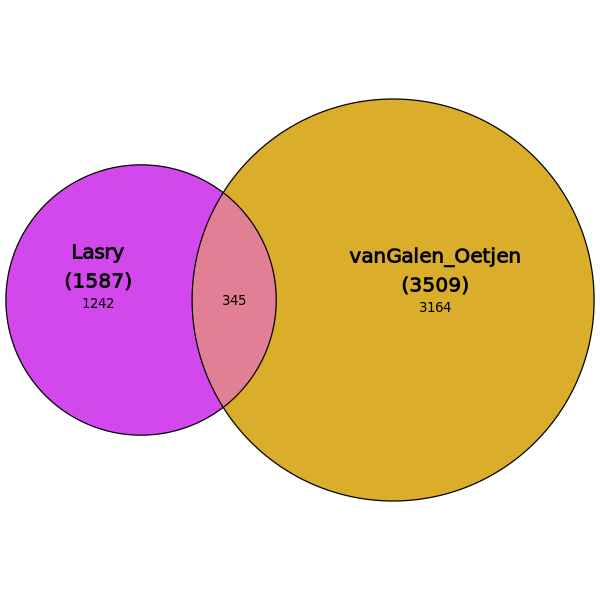

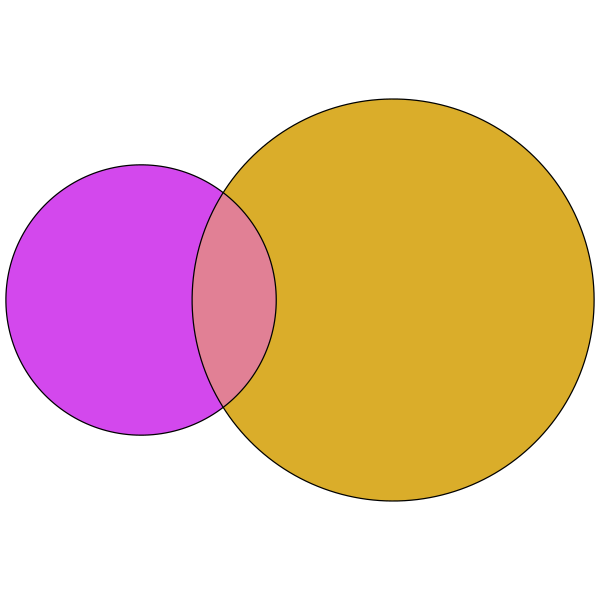

In [7]:
# all sign
# mutual cell types: exclude Gran and NKs
idx_no_gran_NK_lasry <- !(grepl("Gran",interactions_lasry$anno_interactions$interaction_ID)) & !(
grepl("NK",interactions_lasry$anno_interactions$interaction_ID))
int_list <- list(Lasry = interactions_lasry$anno_interactions$interaction_ID[idx_sign_lasry & idx_no_gran_NK_lasry]
                ,vanGalen_Oetjen = interactions_vanGalenOetjen$anno_interactions$interaction_ID[idx_sign_vanGalenOetjen]
                )

# add numbers to the names
numbers <- c(sum(idx_sign_lasry & idx_no_gran_NK_lasry)
             ,sum(idx_sign_vanGalenOetjen)
            )
names(int_list) <- paste0(names(int_list)
                         ,"\n"
                         ,"("
                         ,numbers
                         ,")")
options(repr.plot.width = 5
       ,repr.plot.height = 5)
plot(euler(int_list
         # , shape = "ellipse"
          )
     ,fills = c(Lasry = "#d348ed"
                ,vanGalen_Oetjen = "#daad2a"
               )
     ,quantities = list(fontsize = 8)
    )

plot(euler(int_list
          #, shape = "ellipse"
          )
     ,fills = c(Lasry = "#d348ed"
                ,vanGalen_Oetjen = "#daad2a"
               )
     ,labels = list(cex = 0)
    )

### Heatmap

In [8]:
# prepare data for centred Heatmap: interactions among the immune populations that are overlapping between the Lasry and teh vanGalen_Oetjen datasets
set.seed(3)

int_overlap <- intersect(int_list$Lasry
                             ,int_list$vanGalen_Oetjen
                             )

int_overlap_immune <- int_overlap[!(grepl("Ery",int_overlap)) & !(grepl("HSPC", int_overlap))]
print(paste("We have", length(int_overlap_immune), "interactions among immune populations that overlap between Lasry and vanGalen_Oetjen."))

weights_Lasry_vanGalenOetjen <- cbind(interactions_lasry$weights[int_overlap_immune,]
                               ,interactions_vanGalenOetjen$weights[int_overlap_immune,])

my_max <- max(weights_Lasry_vanGalenOetjen)

my_interactions <- list(weights = weights_Lasry_vanGalenOetjen
                       ,anno_samples = rbind(interactions_lasry$anno_samples[,c("sample_ID"
                                                                               ,"case_or_control")
                                                                            ]
                                             ,interactions_vanGalenOetjen$anno_samples[,c("sample_ID"
                                                                                           ,"case_or_control")
                                                                                        ]
                                            )
                       )

ha <- HeatmapAnnotation(dataset = c(rep("Lasry"
                                       ,nrow(interactions_lasry$anno_samples)
                                       )
                                    ,rep("vanGalen_Oetjen"
                                        ,nrow(interactions_vanGalenOetjen$anno_samples)
                                        )
                                   )
                        ,annotation_legend_param = list(dataset = list(direction = "horizontal"
                                                                       ,title_position = "lefttop"
                                                                      ,nrow = 1
                                                                      ,title_gp = gpar(fontsize = 16)
                                                                       ,labels_gp = gpar(fontsize = 16)
                                                                      )
                                                         
                                                       )
                        
                       )

[1] "We have 124 interactions among immune populations that overlap between Lasry and vanGalen_Oetjen."


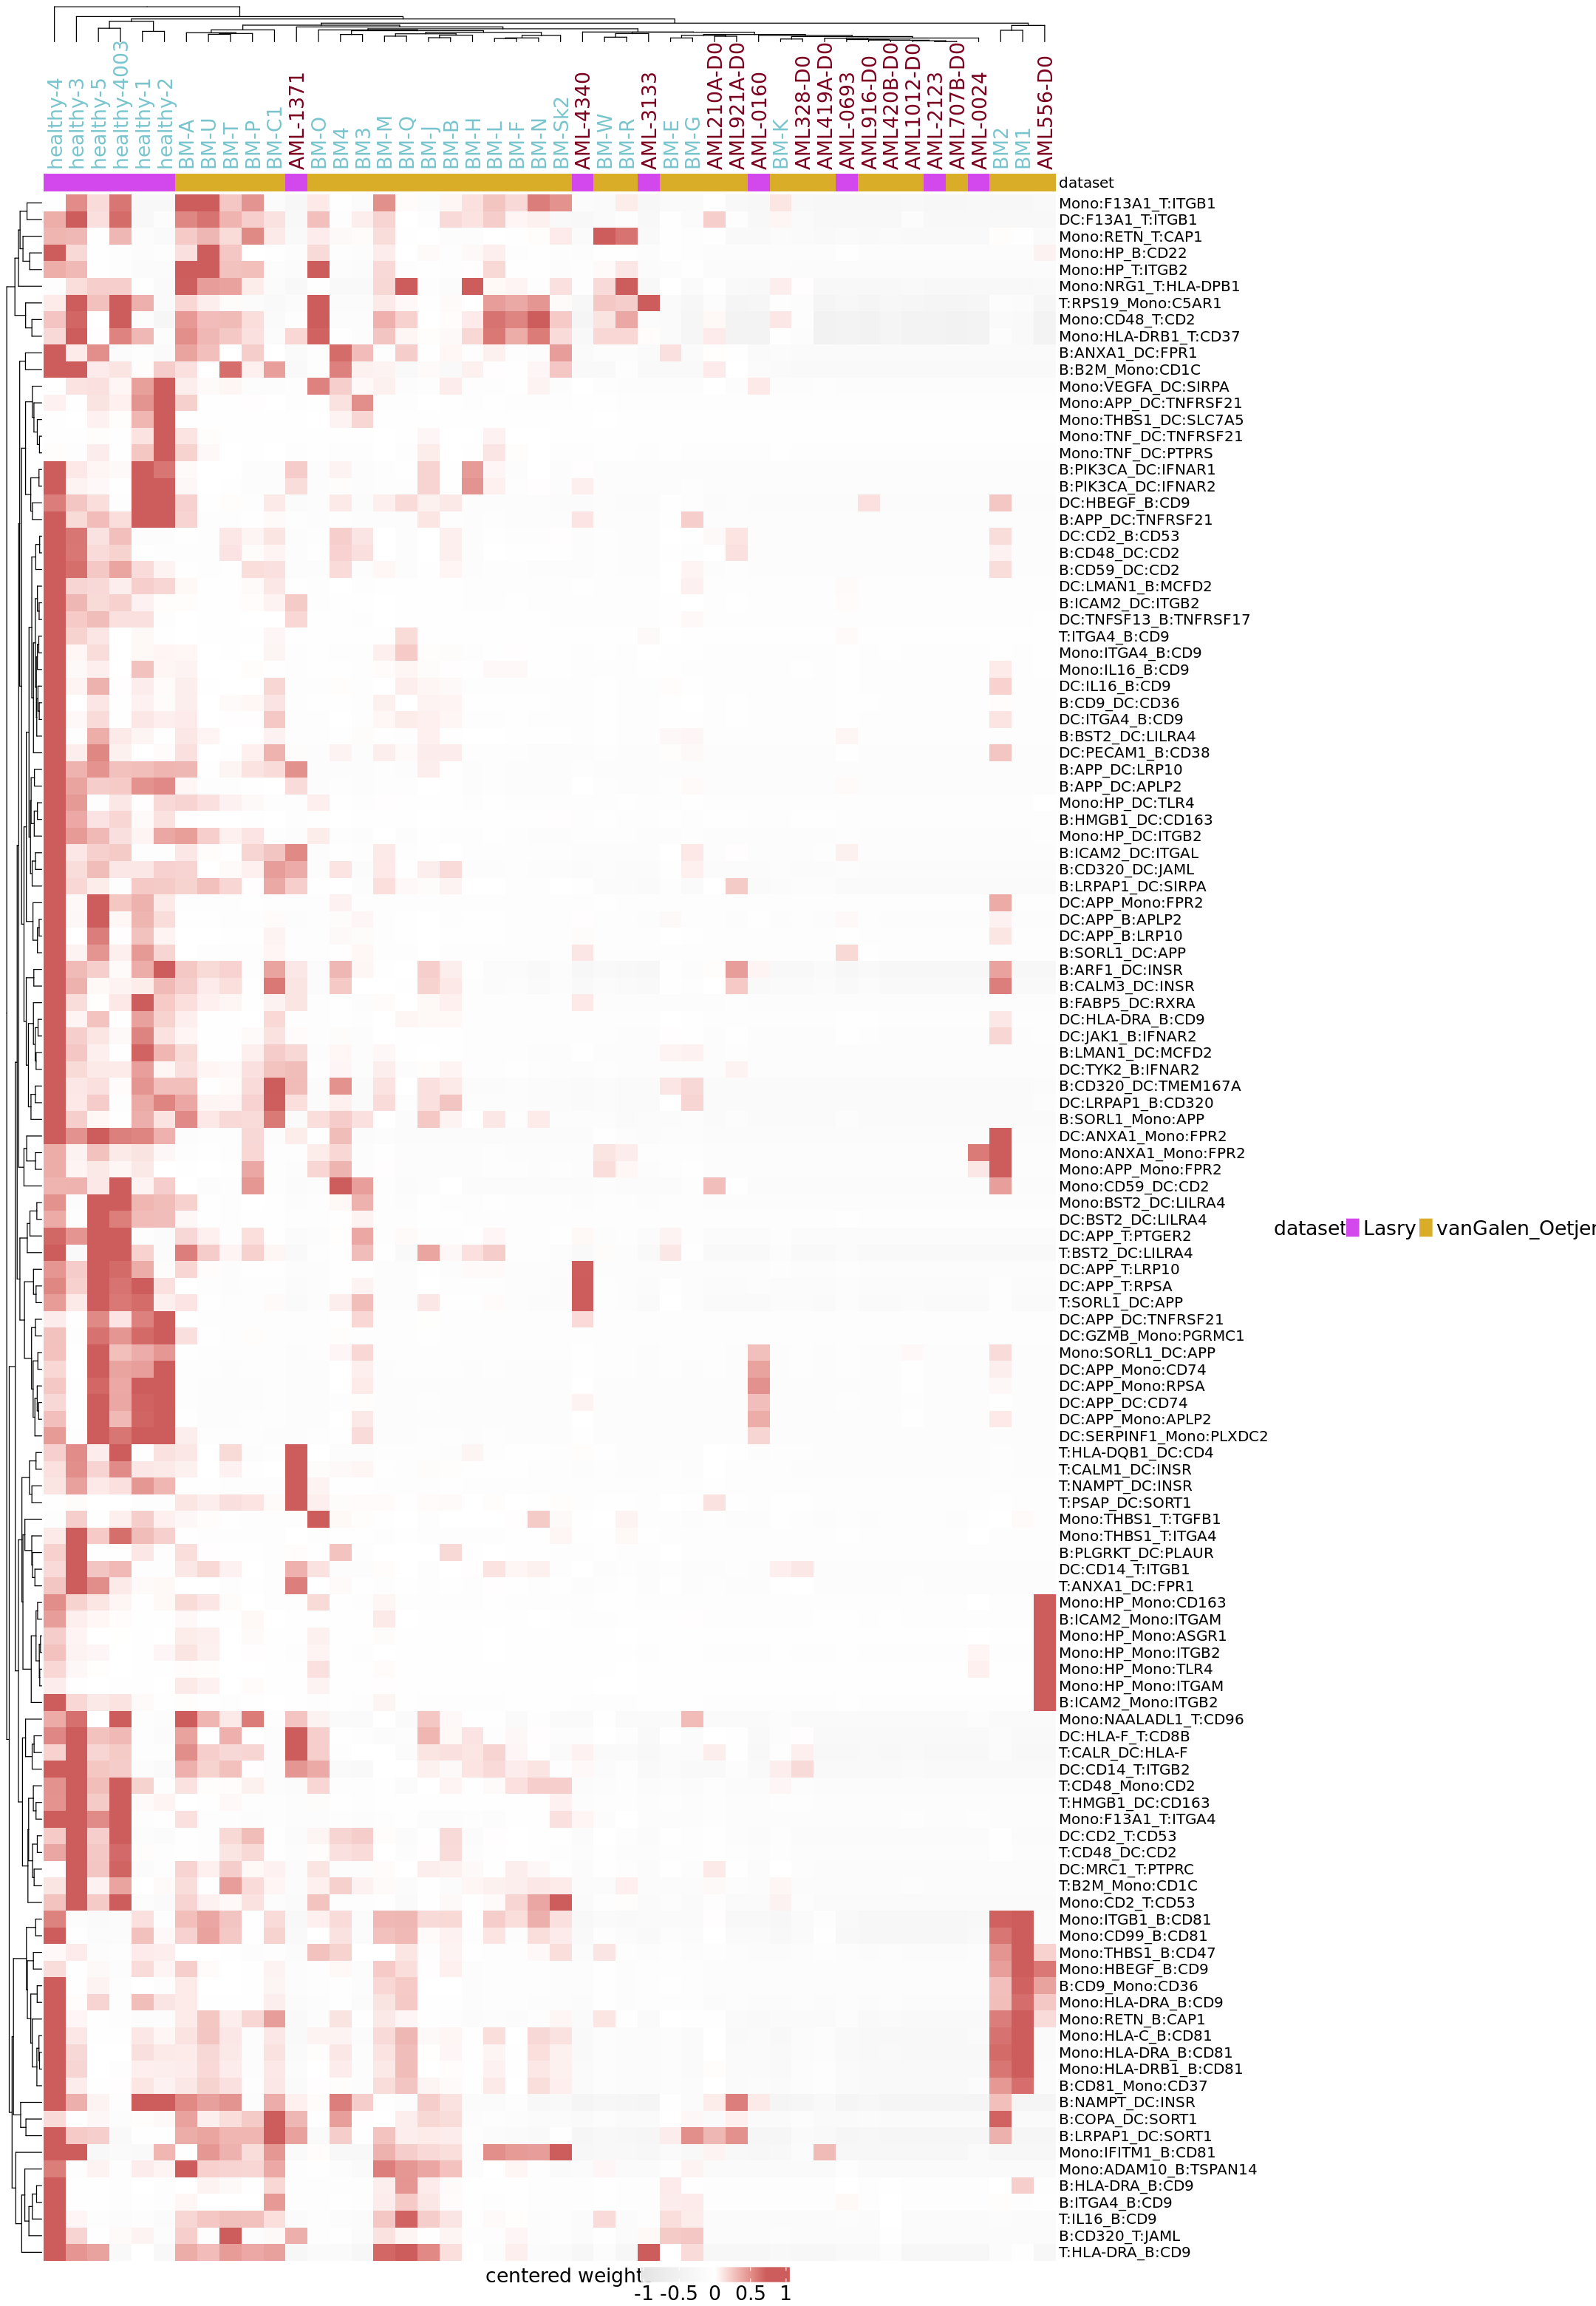

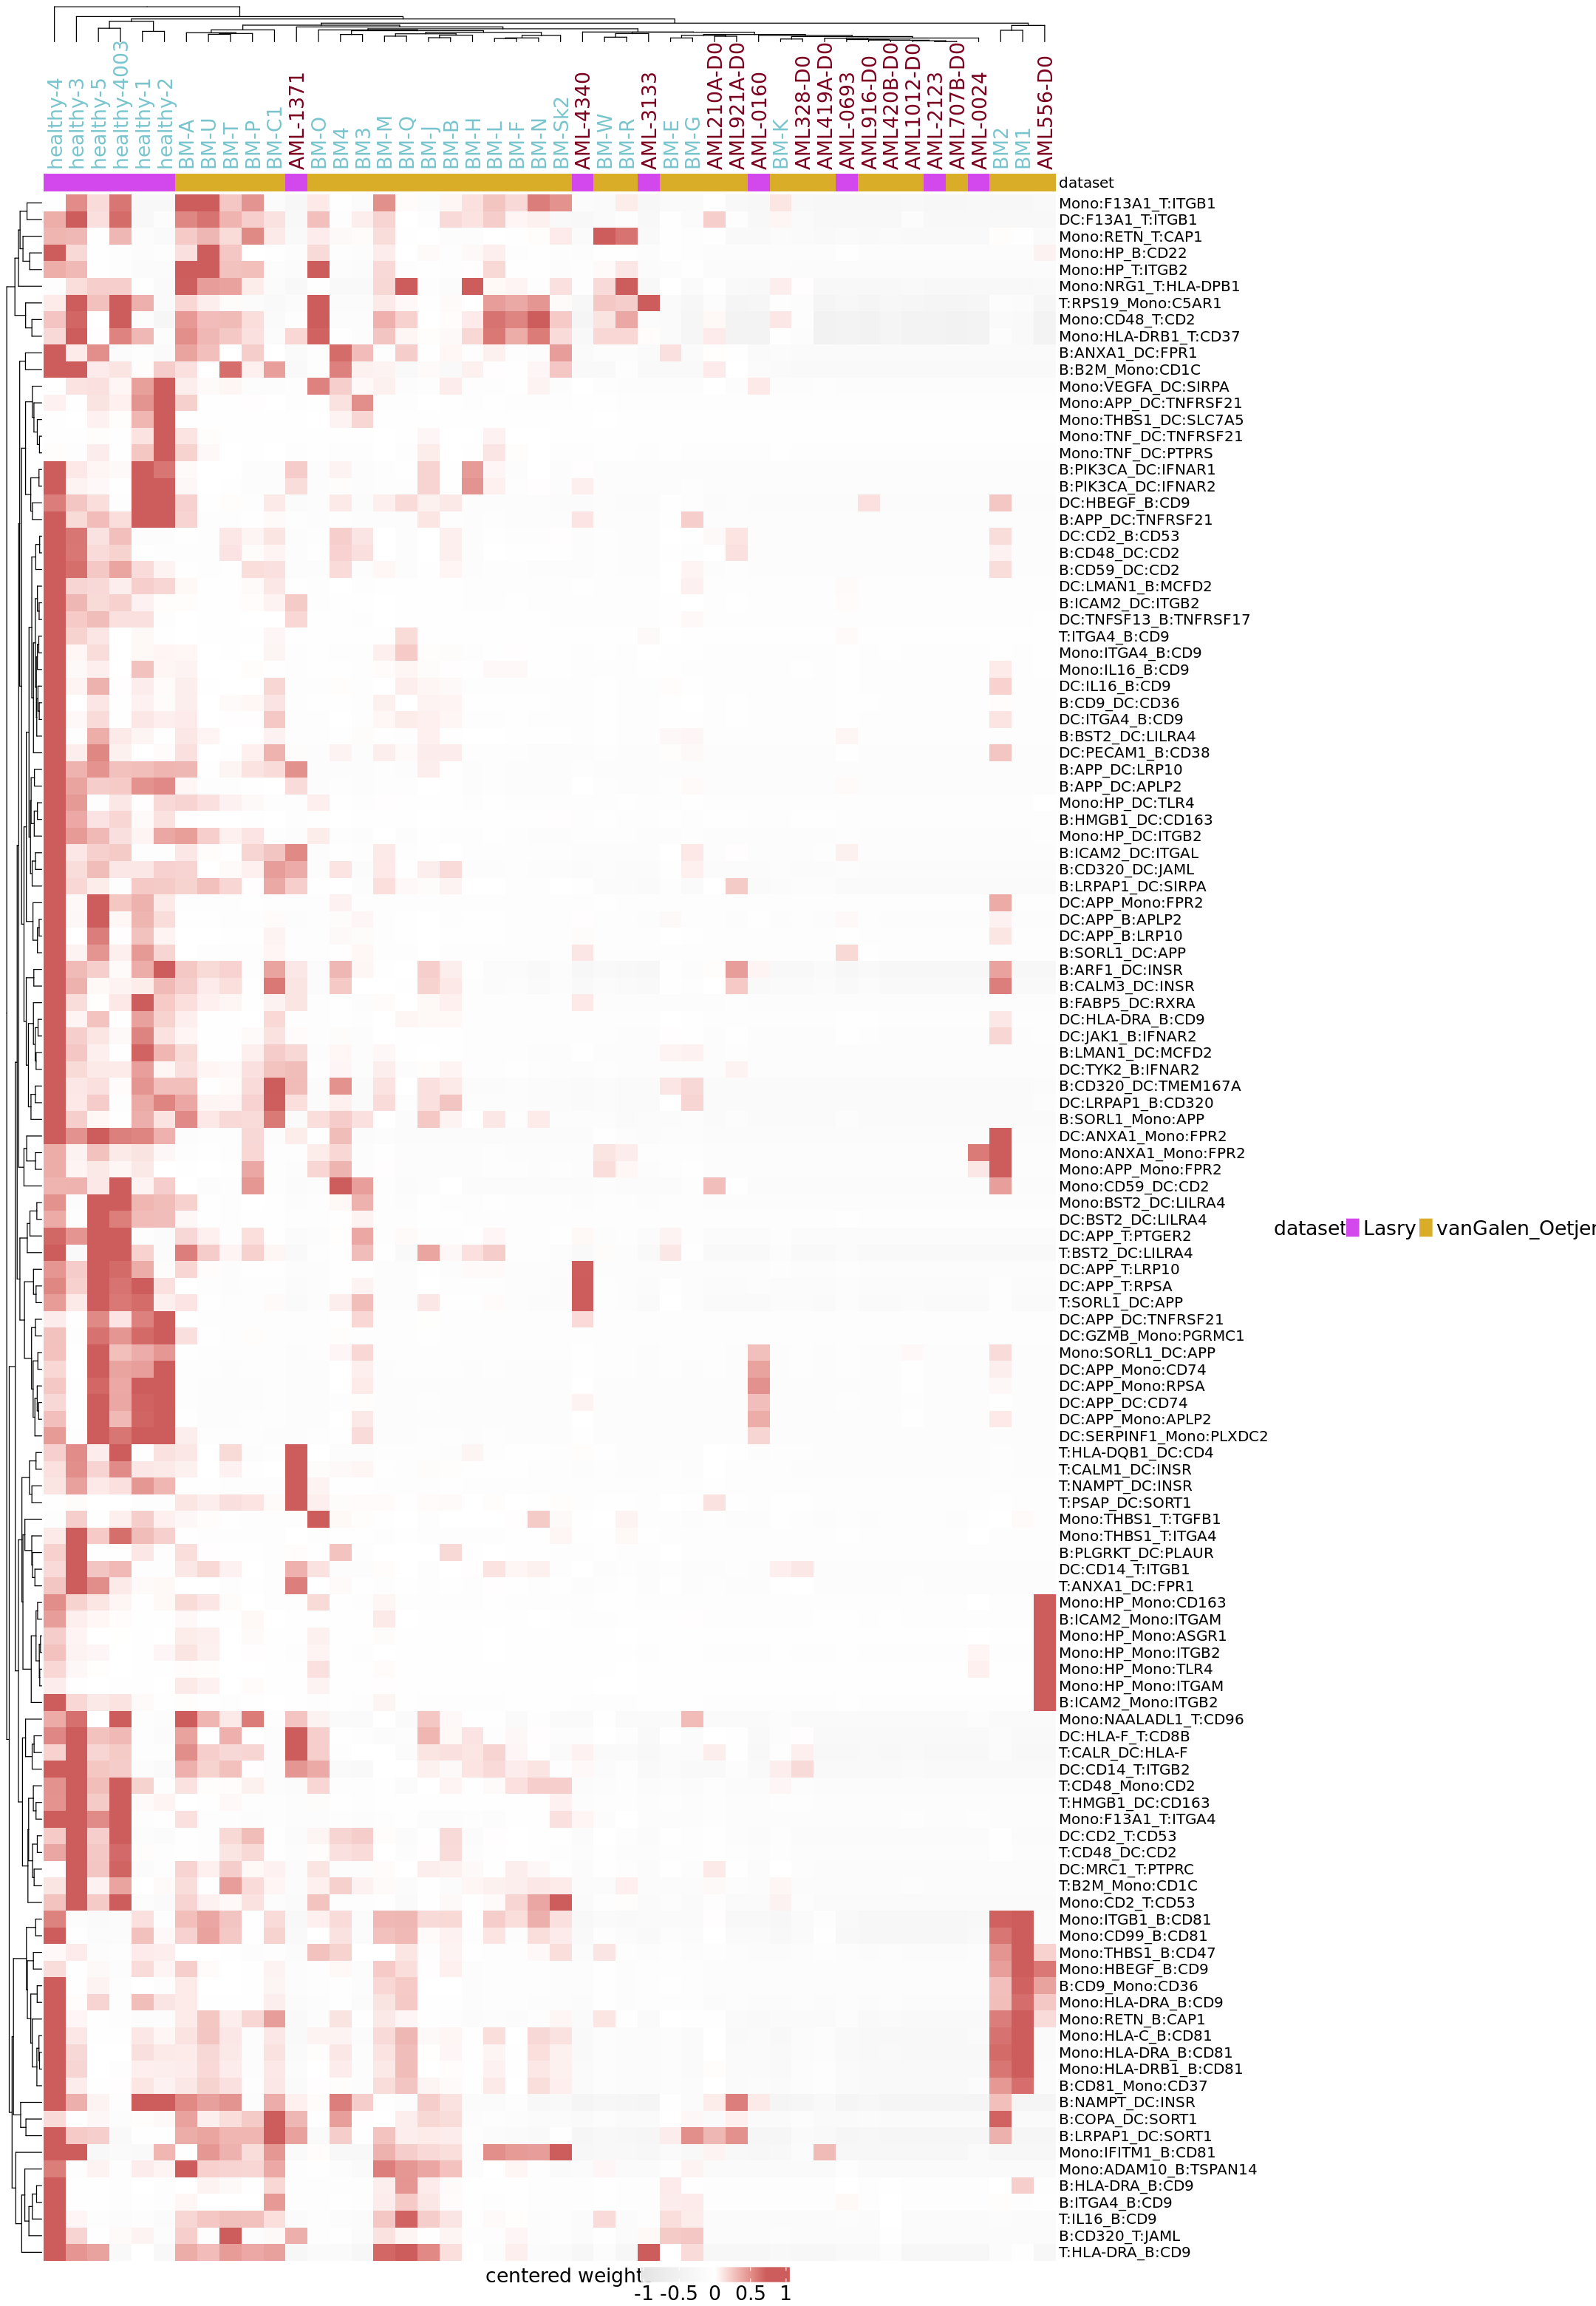

In [9]:
# centred Heatmap

options(repr.plot.height =26#32
       ,repr.plot.width = 18
       )

p <- plot_heatmap(my_interactions
            ,which_interactions = "all"
            ,values_to_plot = "weights"
            ,row_font_size =12
            ,column_font_size = 16
             ,centered = TRUE
             ,color_values = circlize::colorRamp2(c(-1,0,my_max), c("gray90","white", "indianred"))
             ,legend_title_font_size = 16
             ,labels_font_size = 16
             ,top_annotation = ha
            )

draw(p
     , heatmap_legend_side = "bottom"
     , annotation_legend_side = "bottom"
    )

In [11]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /work/project/ladcol_011/conda_path/miniconda3/envs/community_paper/lib/libopenblasp-r0.3.26.so

locale:
 [1] LC_CTYPE=C                 LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] ComplexHeatmap_2.10.0 eulerr_7.0.0          community_1.4.1      

loaded via a namespace (and not attached):
  [1] circlize_0.4.15             readxl_1.4.3               
  [3] uuid_1.1-0                  backports_1.4.1            
  [5] Hmisc_5.1-0